<a href="https://colab.research.google.com/github/TevinMusau/Compiler-Construction/blob/assignment1/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members


1. 115325 Dennis Kipkorir Koech
2. 121058 Faith Sanne Odhiambo
3. 121788 Alumasa Rees
4. 118300 Kenneth Temba Lumuli
5. 102851 Maria Gitau
6. 118640 Tevin Musau Mutua


## **What is FLEX, YACC, LEX and BISON**

# FLEX - Fast Lexical Analyzer:
FLEX is a computer program designed by Vern Paxon in 1987 for generating lexical analyzers. Written in C, Flex is more flexible than LEX and YACC while also producing faster code. The program structure of Flex is divided into three sections: **the definition section**, which contains the declaration of variables, regular definitions, manifest constants all of which are enclosed in "%{}%"; **the rules section**, which contains a series of rules in the form of pattern and action which areeonclosed in "%%%%"; and **the user code section** which contains C statements and additional functions.
Flex is a tool for generating scanners, thus to perform this:
 - Flex reads the given input files, or its standard input, if no file names are given, for a description of a desired scanner to generate. The description is in the form of pairs of regular expressions and C code, called rules. 
 - Flex generates as output a C source file, lex.yy.c, which defines a routine yylex(). 
 - This file is compiled and linked with the -lfl library to produce an executable. 
 - When the executable is run, it analyzes its input for occurrences of the regular expressions. 
 - Whenever it finds one, it executes the corresponding C code.


An example of Flex Syntax:


In [ ]:
#The definition section which contains a single variable
%{
int count = 0;
%}
#The rules section ehich contains three rules
  #first rule matches with capital letters
  #second rule matches with any character except newline
  #third rule does not take input after the enter
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%
#Code Section prints the number of capital letter present in the given input
int yywrap(){}
int main(){
yylex();
printf("\nNumber of Capital letters " 
      "in the given input - %d\n", count);
  
return 0;
}

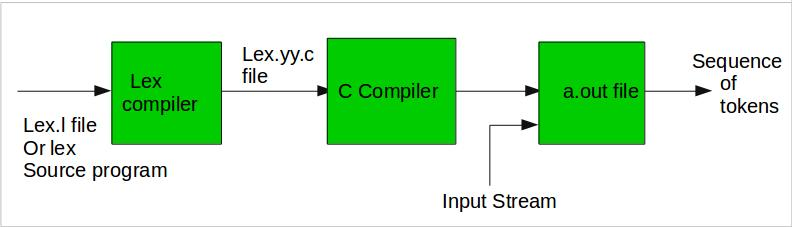

##YACC - Yet Another Compiler-Compiler
Yacc is a computer program for the Unix Operating systems developed by Stephen C, Johnson. It is a Look Ahead Left-to-Right Rightmost Derivation (LALR) parser-generator. LALR parser-generators are desirable because they are very fast and small in comparison to other types of parsers. The program structure of Yacc is similar to Flex in that is is divided into three sections, those being the definitions, rules and user code.


YACC Diagram (Source: (Nachiappan, n.d.))

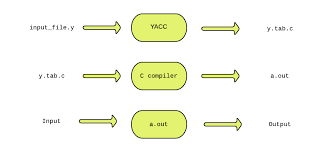

In [ ]:
%{
   include <ctype.h>
   include <stdio.h>
   define YYSTYPE double /* double type for yacc stack */
%}
 
%%
 Lines :  Lines S '\n' { printf("OK \n"); }
       |  S '\n’
       |  error '\n' {yyerror("Error: reenter last line:");
                        yyerrok; };
 S     :  '(' S ')’
       |  '[' S ']’
       |   /* empty */    ;
%%
 
include "lex.yy.c"
  
void yyerror(char * s)
/* yacc error handler */
{  
 fprintf (stderr, "%s\n", s);
}
  
int main(void)
 {
 return yyparse();
 } 

#LEX - Lexical Analyser Generator
Lex is a program that generates lexical analyzer that reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program (LEX - Javatpoint, n.d.). It is used with YACC parser generator. Lex File format follows the same format as Flex and Yacc, in that it is divided into three sections of definitions, rules and user code functions.

A diagram representing Lex (Source: ):

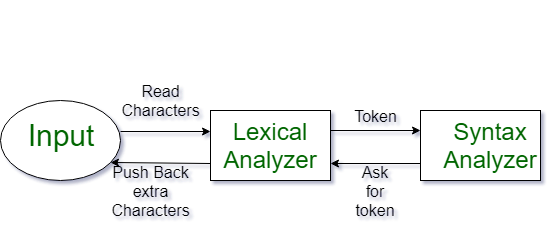

In [ ]:
/*Declarations section start here*/

/* Auxiliary declarations start here*/

%{
	include <stdio.h>
	int global_variable;
%}

/*Auxiliary declarations end & Regular definitions start here*/

    number [0-9]+           //Regular definition
    op     [-|+|*|/|^|=]    //Regular definition

/*Declarations section ends here*/

%%

/* Rules */

%%

/* Auxiliary functions */

# References
1. GeeksforGeeks. (2022, June 28). Flex (Fast Lexical Analyzer Generator ). Retrieved September 9, 2022, from https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/
2. Paxson, V. (1995, April). Flex (2.5) [Software]. https://www.di.uminho.pt/~prh/FlexTutorial.pdf